# Perkenalan

Nama/Batch = Sandika/008

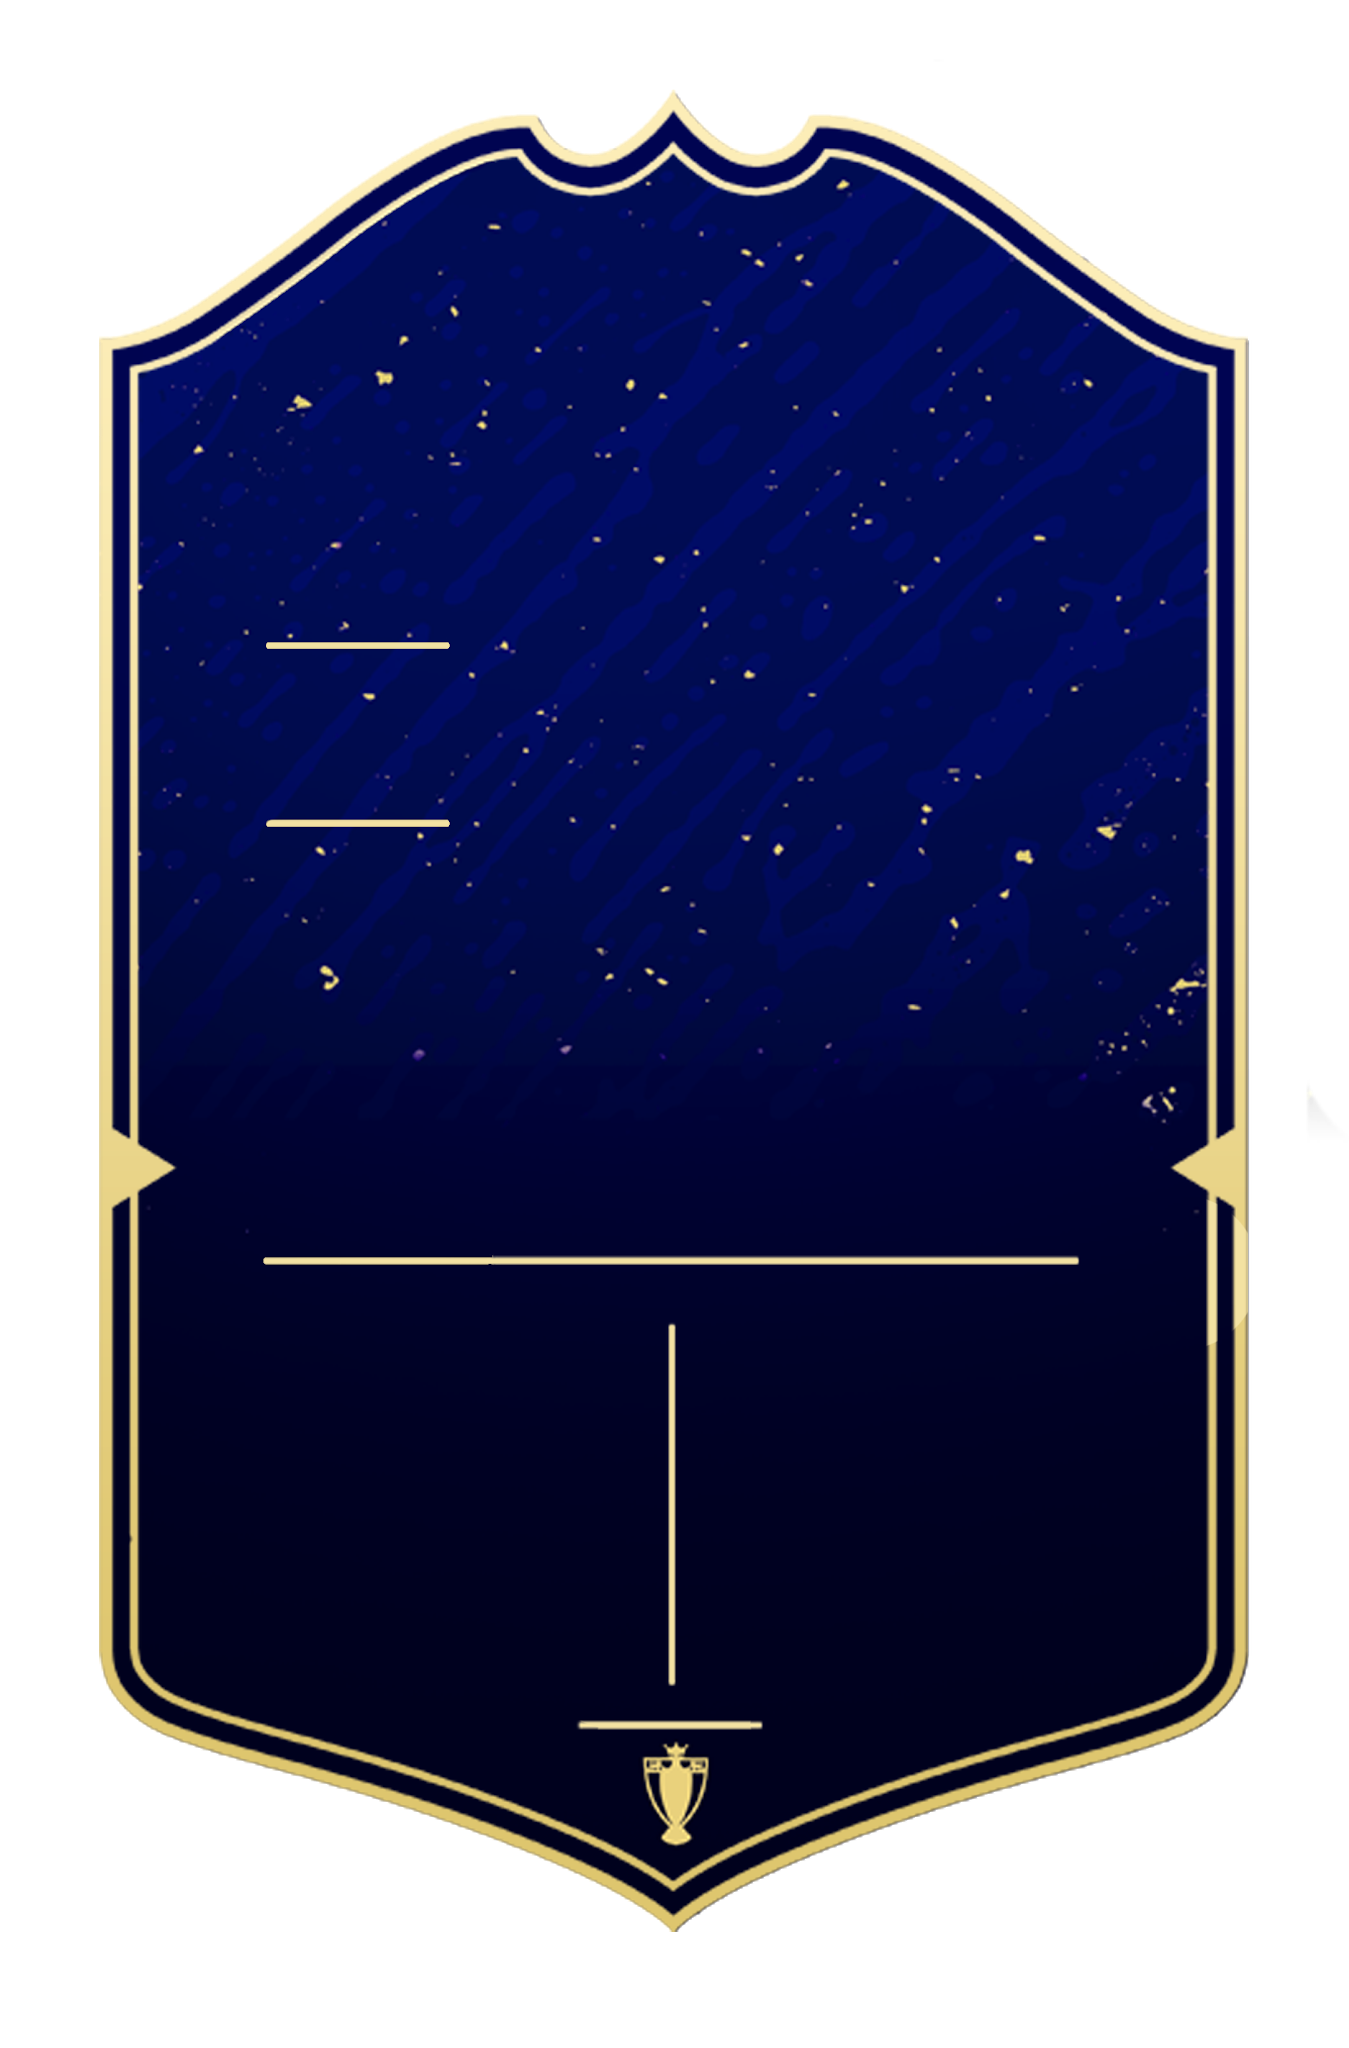




**Objektif**

Melakukan clustering untuk pemain bola dari status fisik ditiap pemainnya untuk menentukan posisi mana yang cocok terhadap pemain tersebut, 

# Import Pustaka

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
import matplotlib.cm as cm
from sklearn.mixture import GaussianMixture
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA

# Data Loading

In [133]:
df_dummy = pd.read_csv('fut22players.csv')
df_dummy.head()

,player_image,player_name,overall,position,club,club_image,league,league_image,nationality,nationality_image,revision,pace,shooting,passing,dribbling,defending,physicality
0,https://cdn.futbin.com/content/fifa22/img/play...,Pelé,98,CAM,FUT 22 ICONS,https://cdn.futbin.com/content/fifa22/img/club...,Icons,https://cdn.futbin.com/content/fifa22/img/leag...,Brazil,https://cdn.futbin.com/content/fifa22/img/nati...,Icon,95,96,93,96,60,76
1,https://cdn.futbin.com/content/fifa22/img/play...,Ronaldo,96,ST,FUT 22 ICONS,https://cdn.futbin.com/content/fifa22/img/club...,Icons,https://cdn.futbin.com/content/fifa22/img/leag...,Brazil,https://cdn.futbin.com/content/fifa22/img/nati...,Icon,97,95,81,95,45,76
2,https://cdn.futbin.com/content/fifa22/img/play...,Diego Maradona,95,CAM,FUT 22 ICONS,https://cdn.futbin.com/content/fifa22/img/club...,Icons,https://cdn.futbin.com/content/fifa22/img/leag...,Argentina,https://cdn.futbin.com/content/fifa22/img/nati...,Icon,88,91,90,95,42,75
3,https://cdn.futbin.com/content/fifa22/img/play...,Ferenc Puskás,94,CF,FUT 22 ICONS,https://cdn.futbin.com/content/fifa22/img/club...,Icons,https://cdn.futbin.com/content/fifa22/img/leag...,Hungary,https://cdn.futbin.com/content/fifa22/img/nati...,Icon,91,96,91,92,46,76
4,https://cdn.futbin.com/content/fifa22/img/play...,Lev Yashin,94,GK,FUT 22 ICONS,https://cdn.futbin.com/content/fifa22/img/club...,Icons,https://cdn.futbin.com/content/fifa22/img/leag...,Russia,https://cdn.futbin.com/content/fifa22/img/nati...,Icon,95,89,75,96,60,95


In [134]:
df_dummy.shape

(2363, 17)

# EDA

In [135]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   player_image       2363 non-null   object
 1   player_name        2363 non-null   object
 2   overall            2363 non-null   int64 
 3   position           2363 non-null   object
 4   club               2363 non-null   object
 5   club_image         2363 non-null   object
 6   league             2363 non-null   object
 7   league_image       2363 non-null   object
 8   nationality        2363 non-null   object
 9   nationality_image  2363 non-null   object
 10  revision           2363 non-null   object
 11  pace               2363 non-null   int64 
 12  shooting           2363 non-null   int64 
 13  passing            2363 non-null   int64 
 14  dribbling          2363 non-null   int64 
 15  defending          2363 non-null   int64 
 16  physicality        2363 non-null   int64 


tidak ditemukan data dengan value NaN

In [136]:
df_dummy.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


overall        1.031816
pace          -0.855392
shooting      -0.853350
passing       -0.304343
dribbling     -0.711374
defending     -0.179578
physicality   -0.689164
dtype: float64

rata rata data tidak terdistribusi normal

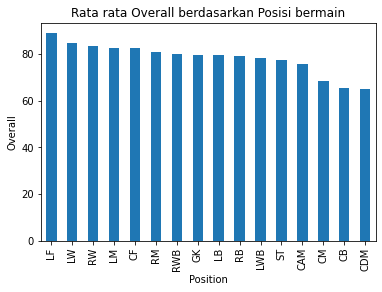

In [215]:
fig5,ax5 = plt.subplots()

df_dummy.groupby('position').mean()['pace'].sort_values(ascending=False).plot(kind='bar',ax=ax5)

ax5.set_title('Rata rata Overall berdasarkan Posisi bermain') 
ax5.set_xlabel('Position') 
ax5.set_ylabel('Pace') 
plt.show()

Atribut pace rata rata posisi lima besar nya diduduki oleh posisi pemain depan

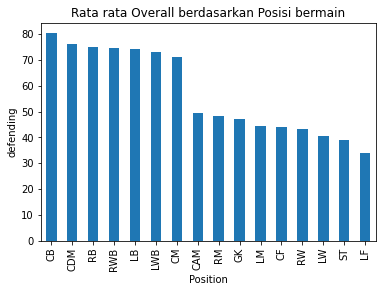

In [216]:
fig5,ax5 = plt.subplots()

df_dummy.groupby('position').mean()['defending'].sort_values(ascending=False).plot(kind='bar',ax=ax5)

ax5.set_title('Rata rata Overall berdasarkan Posisi bermain') 
ax5.set_xlabel('Position') 
ax5.set_ylabel('defending') 
plt.show()

Atribut pace rata rata posisi lima besar nya diduduki oleh posisi pemain belakang dan secara mengejutkan posisi pemain tengah menduduki posisi dua dengan rata rata defending tertinggi

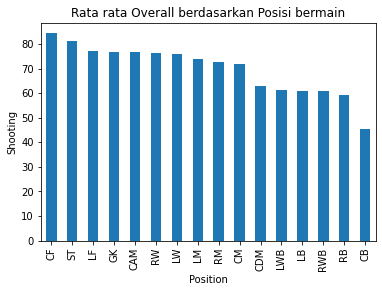

In [217]:
fig5,ax5 = plt.subplots()

df_dummy.groupby('position').mean()['shooting'].sort_values(ascending=False).plot(kind='bar',ax=ax5)

ax5.set_title('Rata rata Overall berdasarkan Posisi bermain') 
ax5.set_xlabel('Position') 
ax5.set_ylabel('Shooting') 
plt.show()

Atribut shooting posisi 5 besar diduduki oleh posisi pemain depan

In [137]:
df_dummy.describe()

,overall,pace,shooting,passing,dribbling,defending,physicality
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,79.848498,74.847651,68.675413,72.366060,76.711384,59.479052,73.834532
std,4.984131,11.437108,14.140310,8.553323,8.260655,18.256356,8.228487
min,71.000000,32.000000,20.000000,38.000000,41.000000,19.000000,35.000000
25%,76.000000,68.000000,62.000000,67.500000,73.000000,42.000000,69.000000
50%,78.000000,77.000000,72.000000,73.000000,78.000000,64.000000,75.000000
75%,82.000000,83.000000,78.000000,78.000000,82.000000,75.000000,80.000000
max,98.000000,97.000000,96.000000,96.000000,97.000000,96.000000,95.000000


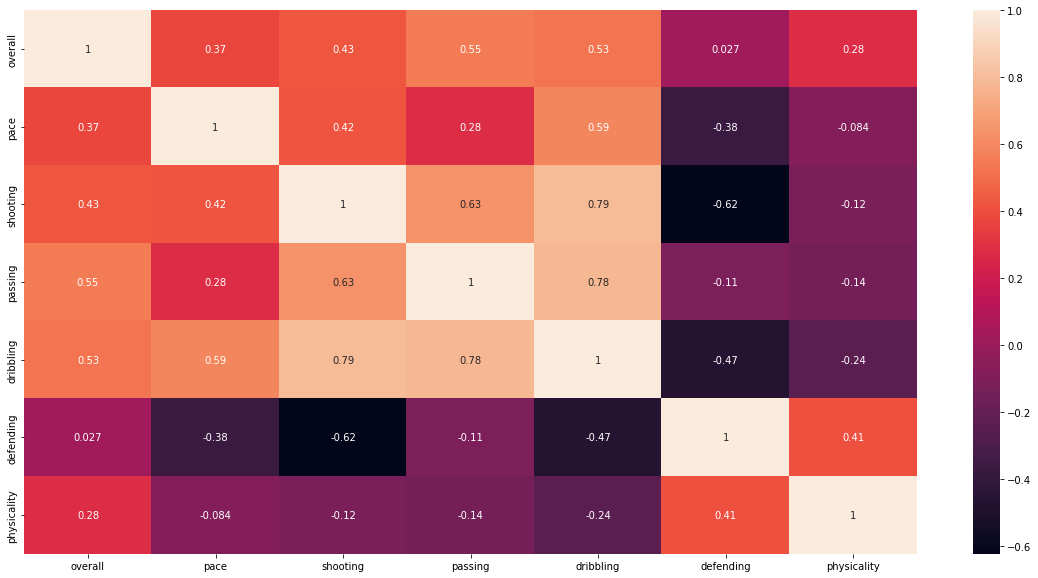

In [138]:
plt.figure(figsize=(20,10))
sns.heatmap(df_dummy.corr(),annot=True)

In [139]:
df_dummy.corr().sort_values('overall', ascending=False, key=abs).index

Index(['overall', 'passing', 'dribbling', 'shooting', 'pace', 'physicality',
       'defending'],
      dtype='object')

Variabel dengan korelasi paling tinggi dengan 'overall'

In [140]:
cat_col = df_dummy.select_dtypes(include=['object']).columns
num_col = df_dummy.select_dtypes(exclude=['object']).columns
print('Numeric Columns:', num_col)
print('categorical Columns:', cat_col)

Numeric Columns: Index(['overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
       'physicality'],
      dtype='object')
categorical Columns: Index(['player_image', 'player_name', 'position', 'club', 'club_image',
       'league', 'league_image', 'nationality', 'nationality_image',
       'revision'],
      dtype='object')


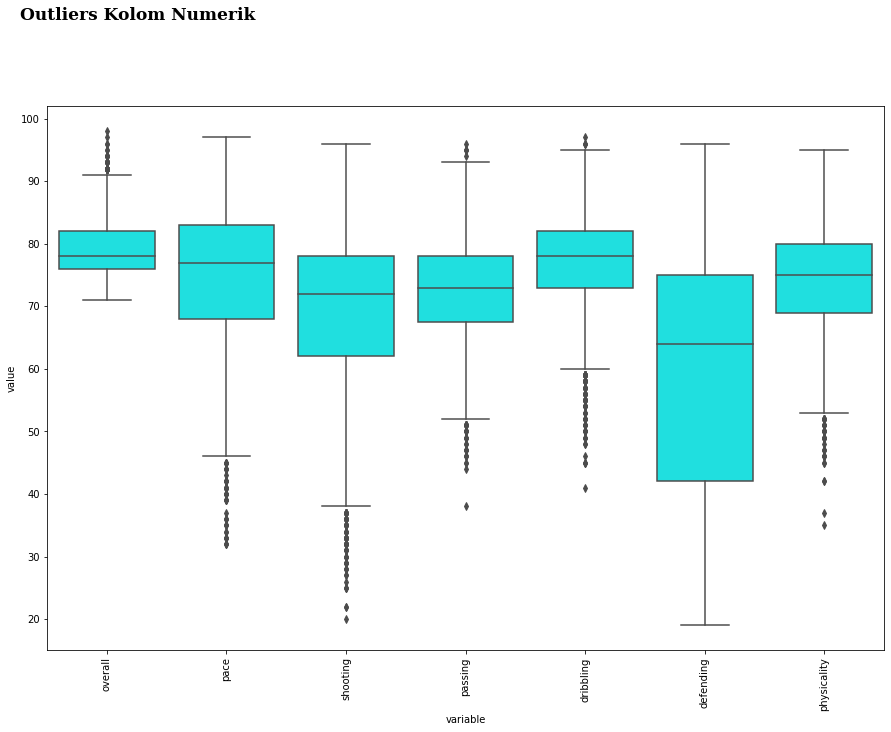

In [141]:
NumericData = df_dummy[[feature for feature in num_col if feature not in []]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Outliers Kolom Numerik", fontfamily='serif', fontsize=17, fontweight='bold')
bp = sns.boxplot(x='variable', y='value', data=NumericMelt, palette=['cyan']*len(num_col))
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

outliers dikolom akan dibiarkan dikarenakan 'outlier' tersebut dianggap normal

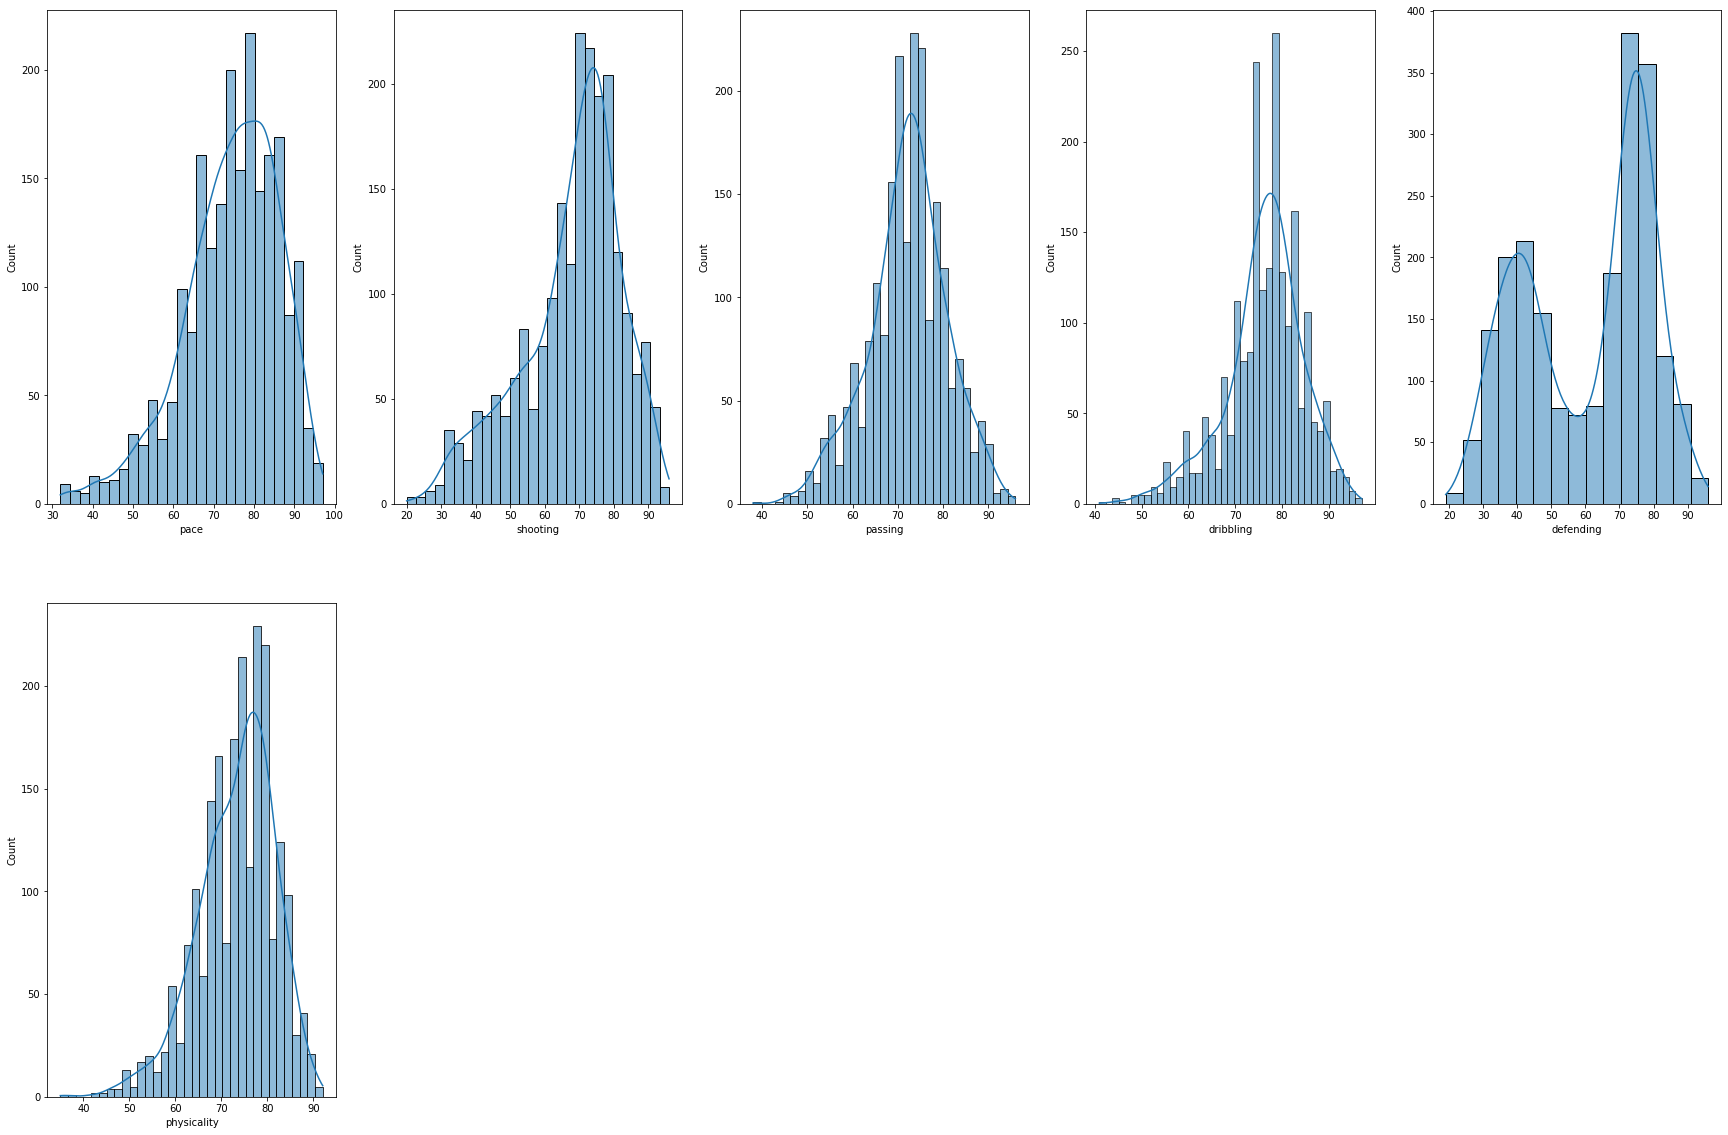

In [211]:
plt.figure(figsize=(30,20))

for i, col in enumerate(list(df.columns)):
    i += 1
    plt.subplot(2,5,i)
    sns.histplot(data = df, x = df[col], kde = True)

Rata rata persebaran data atribut tidak terdistribusi normal dan memiliki skewness

# Data Preprocessing

In [181]:
df=df_dummy.copy()

In [182]:
df.isna().sum()

player_image         0
player_name          0
overall              0
position             0
club                 0
club_image           0
league               0
league_image         0
nationality          0
nationality_image    0
revision             0
pace                 0
shooting             0
passing              0
dribbling            0
defending            0
physicality          0
dtype: int64

In [183]:
df.head()

,player_image,player_name,overall,position,club,club_image,league,league_image,nationality,nationality_image,revision,pace,shooting,passing,dribbling,defending,physicality
0,https://cdn.futbin.com/content/fifa22/img/play...,Pelé,98,CAM,FUT 22 ICONS,https://cdn.futbin.com/content/fifa22/img/club...,Icons,https://cdn.futbin.com/content/fifa22/img/leag...,Brazil,https://cdn.futbin.com/content/fifa22/img/nati...,Icon,95,96,93,96,60,76
1,https://cdn.futbin.com/content/fifa22/img/play...,Ronaldo,96,ST,FUT 22 ICONS,https://cdn.futbin.com/content/fifa22/img/club...,Icons,https://cdn.futbin.com/content/fifa22/img/leag...,Brazil,https://cdn.futbin.com/content/fifa22/img/nati...,Icon,97,95,81,95,45,76
2,https://cdn.futbin.com/content/fifa22/img/play...,Diego Maradona,95,CAM,FUT 22 ICONS,https://cdn.futbin.com/content/fifa22/img/club...,Icons,https://cdn.futbin.com/content/fifa22/img/leag...,Argentina,https://cdn.futbin.com/content/fifa22/img/nati...,Icon,88,91,90,95,42,75
3,https://cdn.futbin.com/content/fifa22/img/play...,Ferenc Puskás,94,CF,FUT 22 ICONS,https://cdn.futbin.com/content/fifa22/img/club...,Icons,https://cdn.futbin.com/content/fifa22/img/leag...,Hungary,https://cdn.futbin.com/content/fifa22/img/nati...,Icon,91,96,91,92,46,76
4,https://cdn.futbin.com/content/fifa22/img/play...,Lev Yashin,94,GK,FUT 22 ICONS,https://cdn.futbin.com/content/fifa22/img/club...,Icons,https://cdn.futbin.com/content/fifa22/img/leag...,Russia,https://cdn.futbin.com/content/fifa22/img/nati...,Icon,95,89,75,96,60,95


In [184]:
df= df[(df['position']!='GK')]

proses penghapusan baris dengan posisi kiper karena kurang nya atribut untuk mencluster posisi kiper

In [187]:
df=df.drop(['player_image',
       'player_name', 'club',
       'club_image', 'league_image', 'nationality_image','league','revision','nationality','position','overall'],axis=1)

In [188]:
df.head()

,pace,shooting,passing,dribbling,defending,physicality
0,95,96,93,96,60,76
1,97,95,81,95,45,76
2,88,91,90,95,42,75
3,91,96,91,92,46,76
5,86,56,75,69,96,83


In [148]:
train_df, test_df = train_test_split(df,test_size=0.2,random_state=21)

In [149]:
kat = [col for col in train_df.columns if train_df[col].dtypes == 'O']
num = [col for col in train_df.columns if train_df[col].dtypes != 'O']
print('Numeric Columns:', num)
print('categorical Columns:', kat)

Numeric Columns: ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physicality']
categorical Columns: []


In [150]:
numerical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='mean')),
('scaler', MinMaxScaler())
])

categorical_pipeline = Pipeline([
('imputer', SimpleImputer(strategy='most_frequent')),
('onehot', OneHotEncoder())
])

In [151]:
preprocessor =  ColumnTransformer([
    ('numeric', numerical_pipeline,[ 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physicality']),
    ('category', categorical_pipeline,[])
])

# Model Definition, Training & Evaluation

In [152]:
pipeline = Pipeline([
    ('prep',preprocessor),
    ('algo',KMeans())
])

In [153]:
pipeline.fit(train_df)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pace', 'shooting',
                                                   'passing', 'dribbling',
                                                   'defending',
                                                   'physicality']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

Hyperparameter tuning untuk mencari jumlah cluster

In [154]:
parameter = {
    'algo__n_clusters': range(3,10),
    'algo__n_init': range(3,10),
    'algo__init' : ['k-means++', 'random']
}

In [155]:
model= GridSearchCV(pipeline, parameter, cv=5, n_jobs=-1, verbose=1, scoring='homogeneity_score')


In [156]:
model.fit(train_df)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  category=UserWarning,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['pace',
                                                                          'shooting',
                                                                          'passing',
                                                                          'dribbling',
                                                                          'defending',
    

In [157]:
estimator=KMeans()

In [158]:
estimator.get_params().keys()

dict_keys(['algorithm', 'copy_x', 'init', 'max_iter', 'n_clusters', 'n_init', 'random_state', 'tol', 'verbose'])

In [159]:
model.best_params_

{'algo__init': 'k-means++', 'algo__n_clusters': 3, 'algo__n_init': 3}

didapatkan klaster terbaik untuk data ini sebesar 3 klaster

## Pembuatan Pipeline setelah hyperparameter tuning

In [160]:
pipeline_best = Pipeline([
    ('prep',preprocessor),
    ('algo',KMeans(n_clusters=3, n_init=3, init='k-means++')
     )
])


In [161]:
pipeline_best.fit(train_df)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['pace', 'shooting',
                                                   'passing', 'dribbling',
                                                   'defending',
                                                   'physicality']),
                                                 ('category',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                             

In [162]:
parameter_best = {
    
}

In [163]:
model_best= GridSearchCV(pipeline_best, parameter_best, cv=5, n_jobs=-1, verbose=1, scoring='homogeneity_score')

In [164]:
y_pred = model_best.fit(train_df)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan]
  category=UserWarning,


In [165]:
y_pred = model_best.predict(train_df)

In [166]:
cluster_df = pd.DataFrame(train_df,columns = df.columns)
cluster_df['Cluster_K_mean'] = y_pred
cluster_df.head(10)

,pace,shooting,passing,dribbling,defending,physicality,Cluster_K_mean
344,87,88,76,88,45,76,1
11,86,91,91,89,82,90,0
1858,78,75,71,76,31,78,1
1105,86,61,71,78,70,78,0
2202,72,74,55,71,23,72,1
405,86,84,84,87,48,63,1
2219,82,71,71,77,64,69,0
906,66,75,75,75,78,84,0
1015,71,69,81,81,28,55,1
336,70,80,85,81,74,79,0


In [167]:
cluster_0 = cluster_df[cluster_df['Cluster_K_mean'] == 0]
cluster_1 = cluster_df[cluster_df['Cluster_K_mean'] == 1]
cluster_2 = cluster_df[cluster_df['Cluster_K_mean'] == 2]

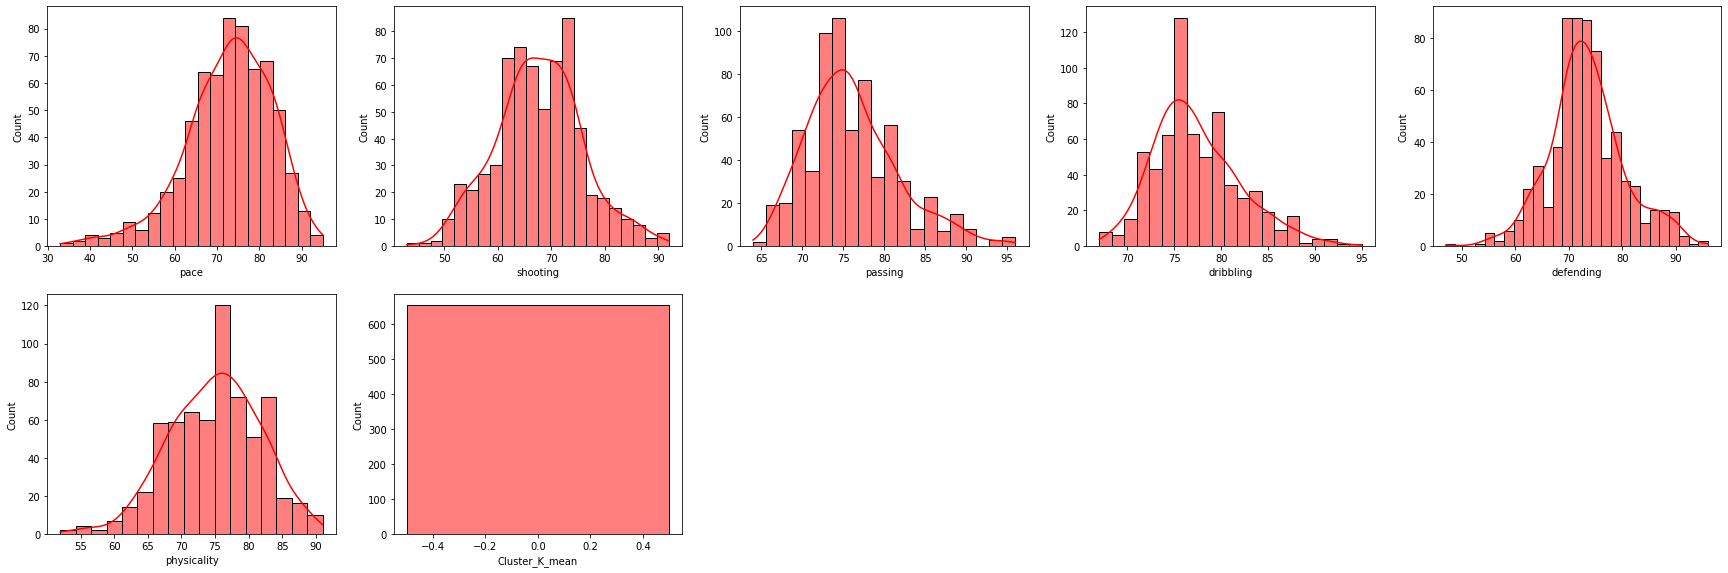

In [168]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(cluster_0.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = cluster_0, x = cluster_0[col], kde = True, color = 'r')

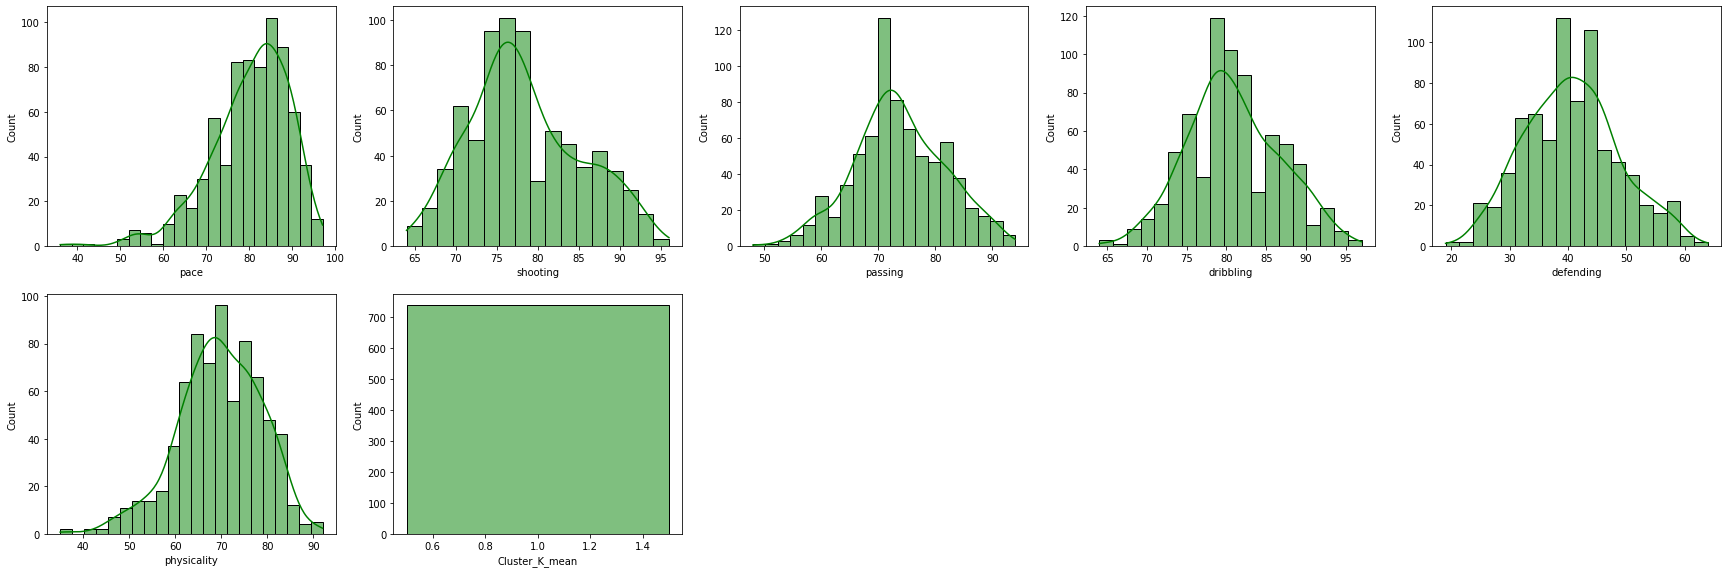

In [169]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(cluster_1.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = cluster_1, x = cluster_1[col], kde = True, color = 'g')

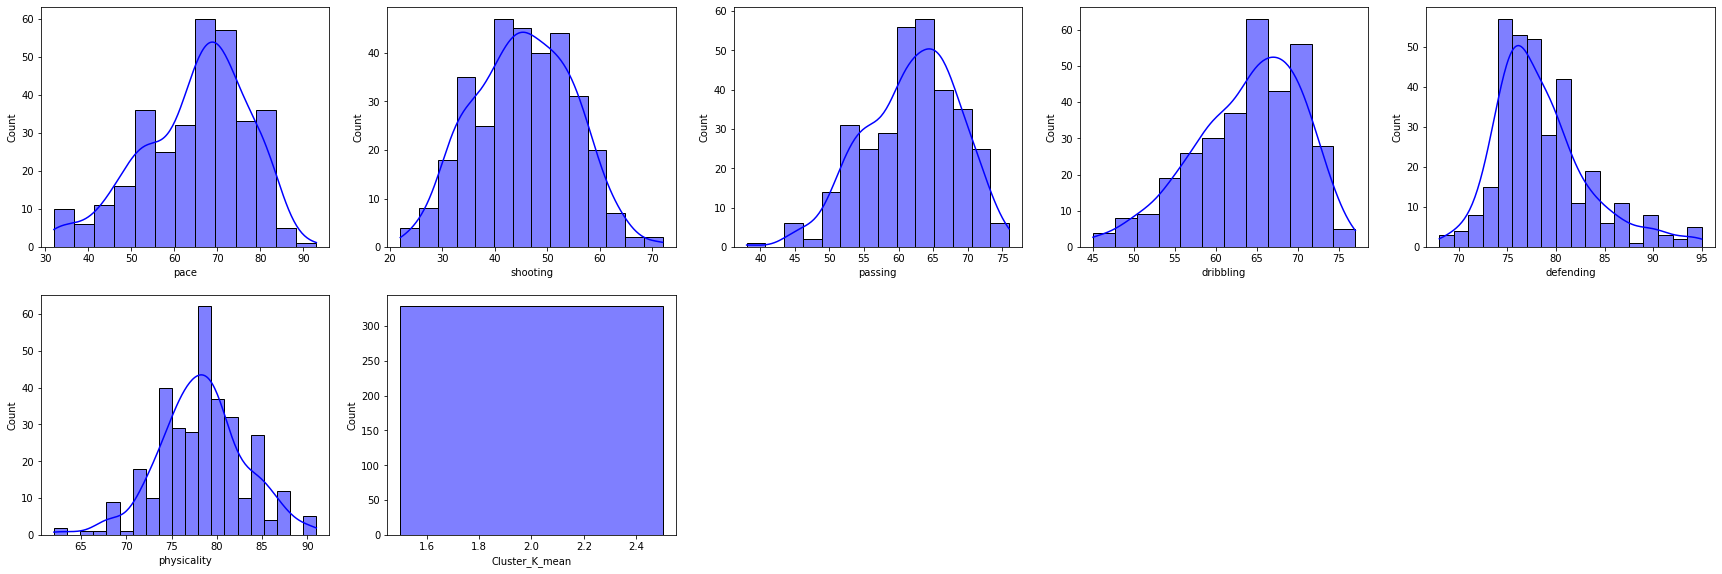

In [170]:
plt.figure(figsize=(30,15))

for i, col in enumerate(list(cluster_2.columns)):
    i += 1
    plt.subplot(3,5,i)
    sns.histplot(data = cluster_2, x = cluster_2[col], kde = True, color = 'b')

In [171]:
kmeans = KMeans(n_clusters=3, n_init=3, init='k-means++')
kmeans.fit(df)
label_km = kmeans.labels_

In [172]:
scaler=MinMaxScaler()
num_scaled = scaler.fit_transform(df)

In [173]:
pca = PCA(n_components=2)
pcafit = pca.fit_transform(num_scaled)

In [174]:
pca_data = pd.DataFrame(data = pcafit, columns = ['pca1','pca2'])
pca_data

,pca1,pca2
0,-0.520660,0.467574
1,-0.582579,0.225540
2,-0.576377,0.239559
3,-0.574134,0.293914
4,0.369158,0.328321
...,...,...
2142,-0.134352,-0.047954
2143,-0.382249,-0.293813
2144,0.346986,-0.038893
2145,0.512333,-0.193796


In [175]:
pca_data = pd.concat([pca_data, pd.DataFrame({'Cluster_K_mean':label_km})],axis=1)
pca_data.head()

,pca1,pca2,Cluster_K_mean
0,-0.520660,0.467574,0
1,-0.582579,0.225540,0
2,-0.576377,0.239559,0
3,-0.574134,0.293914,0
4,0.369158,0.328321,1


In [209]:
pca_data['Cluster_K_mean'] = pca_data['Cluster_K_mean'].replace({0:'Midfielder',1:'Forward',2:'Defender'})

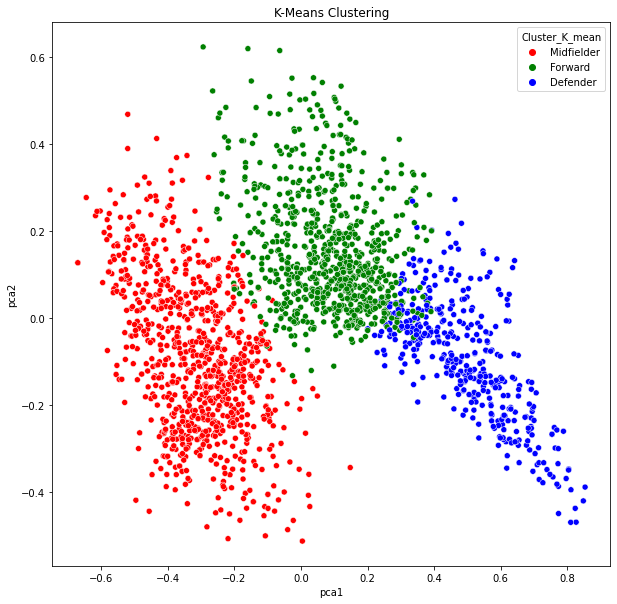

In [210]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2',hue='Cluster_K_mean',data=pca_data,palette=['r','g','b'])
plt.title ('K-Means Clustering')
plt.show()

# Model Inference

In [177]:
data_sample = df.sample(10)
data_sample

,pace,shooting,passing,dribbling,defending,physicality
1269,69,60,77,78,72,66
167,91,89,82,91,46,77
1017,80,70,72,78,75,68
1096,65,71,75,77,76,73
1873,83,75,72,74,51,69
2274,83,69,67,79,54,65
876,55,49,65,65,82,80
1810,69,69,71,77,74,79
2300,63,57,67,71,73,72
473,75,77,85,88,76,58


In [178]:
y_pred_inf = model_best.predict(data_sample)


In [200]:
inference_df = pd.DataFrame(data_sample,columns = df.columns)
inference_df['Cluster_K_mean'] = y_pred_inf
inference_df.head(10)

,pace,shooting,passing,dribbling,defending,physicality,Cluster_K_mean
1269,69,60,77,78,72,66,0
167,91,89,82,91,46,77,1
1017,80,70,72,78,75,68,0
1096,65,71,75,77,76,73,0
1873,83,75,72,74,51,69,1
2274,83,69,67,79,54,65,1
876,55,49,65,65,82,80,2
1810,69,69,71,77,74,79,0
2300,63,57,67,71,73,72,2
473,75,77,85,88,76,58,0


In [201]:
inference_df['Cluster_K_mean'] = inference_df['Cluster_K_mean'].replace({0:'Midfielder',1:'Forward',2:'Defender'})

In [203]:
inference_df.head(10)

,pace,shooting,passing,dribbling,defending,physicality,Cluster_K_mean
1269,69,60,77,78,72,66,Midfielder
167,91,89,82,91,46,77,Forward
1017,80,70,72,78,75,68,Midfielder
1096,65,71,75,77,76,73,Midfielder
1873,83,75,72,74,51,69,Forward
2274,83,69,67,79,54,65,Forward
876,55,49,65,65,82,80,Defender
1810,69,69,71,77,74,79,Midfielder
2300,63,57,67,71,73,72,Defender
473,75,77,85,88,76,58,Midfielder


# Kesimpulan

1. Model Improvement yang digunakan adalah

- cross validation sebanyak 5 kali
- hyper parameter tuning sehingga didapatkan parameter terbaik adalah **n_clusters=3, n_init=3, init='k-means++'**

2. Feature Engineering yang digunakan adalah

- Scaling menggunakan MinMaxScaler dikarenakan banyak data skew dan juga memiliki outliers

3. Kesimpulan dari Clustering

- Cluster 0 cocok bermain sebagai pemain tengah karena memiliki atribut yang merata
- Cluster 1 cocok bermain sebagai pemain depan karena memiliki atribut menyerang yang mumpuni namun atribut defending yang rendah
- Cluster 2 cocok bermain sebagai pemain belakang karena memiliki atribut defending yang menonjol